In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
data = pd.read_csv('report_data.csv')
print(data)

                       user_id       name  review_count  average_stars  \
0       18kPq7GPye-YQ3LyKyAZPw     Russel           108           4.14   
1       rpOyqD_893cqmDAtJLbdog     Jeremy          1274           3.66   
2       4U9kSBLuBDU391x6bxU-YA    Michael           442           3.60   
3       fHtTaujcyKvXglE33Z5yIw        Ken            11           4.64   
4       SIBCL7HBkrP4llolm4SC2A  Katherine            66           3.80   
...                        ...        ...           ...            ...   
552334  5bWq6eXzWQ15S-0qTNjr5Q       Alex            62           4.27   
552335  IfvSeVlGZJUlYnTYRWJhKQ    Andrena             2           1.00   
552336  OhR-zDBVoGC7GjZ8h3MZjw       Andy             2           3.50   
552337  dgQave8eNy52qNDqpmBm8w       Deja             7           3.29   
552338  3KQfDoePO590Of0XjYUp6Q     Ashley             1           5.00   

        cool_votes  funny_votes  useful_votes  \
0              245          167           280   
1            

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552339 entries, 0 to 552338
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        552339 non-null  object 
 1   name           552336 non-null  object 
 2   review_count   552339 non-null  int64  
 3   average_stars  552339 non-null  float64
 4   cool_votes     552339 non-null  int64  
 5   funny_votes    552339 non-null  int64  
 6   useful_votes   552339 non-null  int64  
 7   friends        552339 non-null  object 
 8   elite          552339 non-null  object 
 9   yelping_since  552339 non-null  object 
 10  fans           552339 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.4+ MB


In [5]:
data.describe()

,review_count,average_stars,cool_votes,funny_votes,useful_votes,fans
count,552339.000000,552339.000000,552339.000000,552339.000000,552339.000000,552339.000000
mean,27.631737,3.741178,28.070312,24.805502,51.164710,1.331508
std,87.741127,1.068859,332.290036,297.200716,402.310929,10.798539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.250000,0.000000,0.000000,1.000000,0.000000
50%,6.000000,3.900000,1.000000,1.000000,4.000000,0.000000
75%,18.000000,4.500000,5.000000,5.000000,18.000000,0.000000
max,10320.000000,5.000000,52441.000000,45738.000000,55937.000000,1657.000000


In [40]:
data.corr(numeric_only=True)

,review_count,average_stars,cool_votes,funny_votes,useful_votes,fans
review_count,1.000000,0.004494,0.559061,0.527872,0.665702,0.584906
average_stars,0.004494,1.000000,0.005730,0.001755,0.001898,0.009102
cool_votes,0.559061,0.005730,1.000000,0.976411,0.983271,0.752437
funny_votes,0.527872,0.001755,0.976411,1.000000,0.954654,0.731250
useful_votes,0.665702,0.001898,0.983271,0.954654,1.000000,0.789978
fans,0.584906,0.009102,0.752437,0.731250,0.789978,1.000000


In [10]:
fans = data.fans
cool = data.cool_votes

In [16]:
linear_model = scipy.stats.linregress(fans, cool)
slope = linear_model.slope 
intercept = linear_model.intercept
linear_fit = slope*fans+intercept

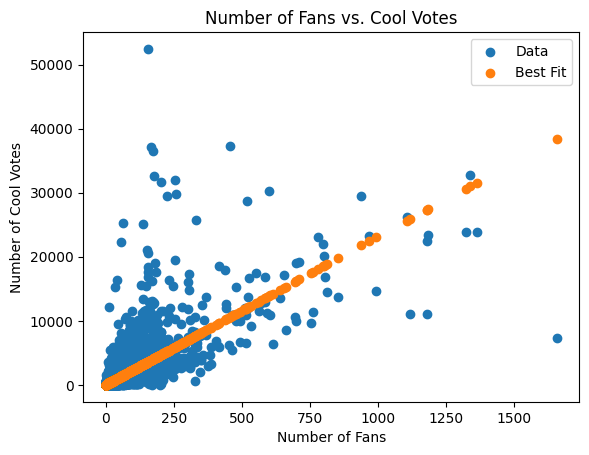

In [38]:
plt.scatter(fans, cool, label="Data")
plt.scatter(fans, linear_fit, label="Best Fit")
plt.xlabel("Number of Fans")
plt.ylabel("Number of Cool Votes")
plt.title("Number of Fans vs. Cool Votes")
plt.legend()
plt.savefig('Fans_Cool.png')

In [19]:
funny = data.funny_votes 
useful = data.useful_votes

In [32]:
linear_model_2 = scipy.stats .linregress(fans, funny)
slope = linear_model_2.slope
intercept = linear_model_2.intercept 
best_fit_2 = fans*slope+intercept 

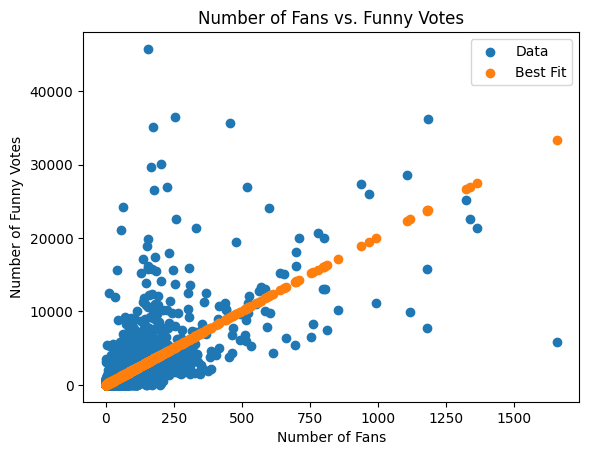

In [35]:
plt.scatter(fans, funny, label="Data")
plt.scatter(fans, best_fit_2, label="Best Fit")
plt.xlabel("Number of Fans")
plt.ylabel("Number of Funny Votes")
plt.legend()
plt.title("Number of Fans vs. Funny Votes")
plt.savefig('Fans_Funny.png')

In [28]:
linear_model_3 = scipy.stats.linregress(fans, useful)
slope = linear_model_3.slope
intercept = linear_model_3.intercept
best_fit = slope*fans+intercept

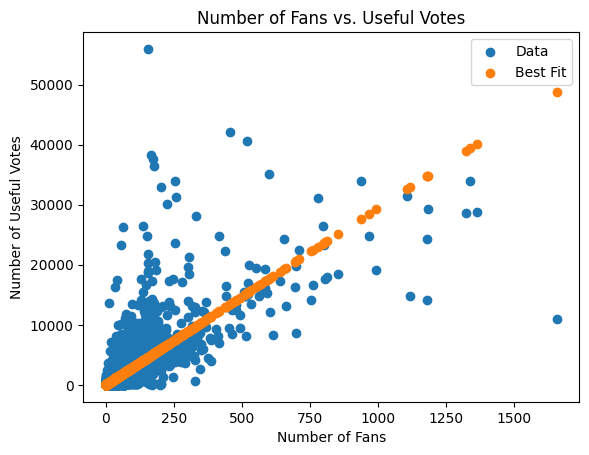

In [34]:
plt.scatter(fans, useful, label="Data")
plt.scatter(fans, best_fit, label="Best Fit")
plt.xlabel("Number of Fans")
plt.ylabel("Number of Useful Votes")
plt.title("Number of Fans vs. Useful Votes")
plt.legend()
plt.savefig('Fans_Useful.png')